In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Target Class 
###### y - has the client subscribed a term deposit? (binary: "yes","no")

### Target Class Details
- A term deposit refers to when you lock your money in an account for a certain period of time and at a specified interest rate. You will not be able to access your money for the length of the agreed term without incurring a penalty fee.
- The target class is to determine ia a client will subscribe to a term deposit based on certain features
- All features details are shown below

### Features Details 
-  Each column will be describe below

In [2]:
text = open("resources/bank-additional-names.txt", mode="r").read()

In [3]:
print(text[0:])

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [4]:
df = pd.read_csv("resources/bank.csv")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### DATA EVALUATION
- WE will check for misisng data
- Describe -Min max values
- column Count etc 

# info
- Has 4521 clients and 17 columns 
- 16 comumnd of features and 1 for our target y-> Term Deposit Account

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Converting Columns
- Since we need numeric values for out model we will need to convert the values to one hot encoding 
- This will assit with processing the data and our Visualization

# Jobs
- Will one hot encode then drop the jobs columns 
- Will drop the first column because it will be a perfect predictor of the remaining columns

In [8]:
df["job"].nunique()

12

In [9]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [10]:
jobs_oneHot = pd.get_dummies(df["job"], drop_first=True)

In [11]:
df.drop("job", axis=1, inplace=True)

In [12]:
df = pd.concat([df,jobs_oneHot], axis=1)

### Marital Status

In [13]:
df["marital"].nunique()

3

In [14]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
marital = pd.get_dummies(df["marital"], drop_first=True)

In [16]:
df.drop("marital", axis=1, inplace=True)

In [17]:
df = pd.concat([df, marital], axis=1)

In [18]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single
0,30,primary,no,1787,no,no,cellular,19,oct,79,...,0,0,0,0,0,0,1,0,1,0
1,33,secondary,no,4789,yes,yes,cellular,11,may,220,...,0,0,0,1,0,0,0,0,1,0
2,35,tertiary,no,1350,yes,no,cellular,16,apr,185,...,1,0,0,0,0,0,0,0,0,1
3,30,tertiary,no,1476,yes,yes,unknown,3,jun,199,...,1,0,0,0,0,0,0,0,1,0
4,59,secondary,no,0,yes,no,unknown,5,may,226,...,0,0,0,0,0,0,0,0,1,0


## Education

In [19]:
df["education"].nunique()

4

In [20]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [21]:
ed = pd.get_dummies(df["education"], drop_first= True)

In [22]:
df = pd.concat([df, ed], axis=1)

In [23]:
df.drop("education", axis=1, inplace=True)

In [24]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown
0,30,no,1787,no,no,cellular,19,oct,79,1,...,0,0,0,1,0,1,0,0,0,0
1,33,no,4789,yes,yes,cellular,11,may,220,1,...,1,0,0,0,0,1,0,1,0,0
2,35,no,1350,yes,no,cellular,16,apr,185,1,...,0,0,0,0,0,0,1,0,1,0
3,30,no,1476,yes,yes,unknown,3,jun,199,4,...,0,0,0,0,0,1,0,0,1,0
4,59,no,0,yes,no,unknown,5,may,226,1,...,0,0,0,0,0,1,0,1,0,0


### Default
- If a client has defaulted 
- since this is binary we can simply convert and set the new comumn without concatination

In [25]:
default = pd.get_dummies(df["default"], drop_first=True)

In [26]:
df["default"] = default

## Housing 
- We will use binary concatination to the column

In [27]:
housing = pd.get_dummies(df["housing"], drop_first=True)

In [28]:
df["housing"] = housing

In [29]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown
0,30,0,1787,0,no,cellular,19,oct,79,1,...,0,0,0,1,0,1,0,0,0,0
1,33,0,4789,1,yes,cellular,11,may,220,1,...,1,0,0,0,0,1,0,1,0,0
2,35,0,1350,1,no,cellular,16,apr,185,1,...,0,0,0,0,0,0,1,0,1,0
3,30,0,1476,1,yes,unknown,3,jun,199,4,...,0,0,0,0,0,1,0,0,1,0
4,59,0,0,1,no,unknown,5,may,226,1,...,0,0,0,0,0,1,0,1,0,0


## Loan 
- If the client has a personal loan
- Taking the binary concatination approach here as well

In [30]:
loan = pd.get_dummies(df["loan"], drop_first=True)

In [31]:
df["loan"] = loan

In [32]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,services,student,technician,unemployed,unknown,married,single,secondary,tertiary,unknown
0,30,0,1787,0,0,cellular,19,oct,79,1,...,0,0,0,1,0,1,0,0,0,0
1,33,0,4789,1,1,cellular,11,may,220,1,...,1,0,0,0,0,1,0,1,0,0
2,35,0,1350,1,0,cellular,16,apr,185,1,...,0,0,0,0,0,0,1,0,1,0
3,30,0,1476,1,1,unknown,3,jun,199,4,...,0,0,0,0,0,1,0,0,1,0
4,59,0,0,1,0,unknown,5,may,226,1,...,0,0,0,0,0,1,0,1,0,0


### contact type
- How the client was contacted or means of communication

In [33]:
df["contact"].nunique()

3

In [34]:
contact = pd.get_dummies(df["contact"], drop_first=True)

In [35]:
df= pd.concat([df, contact], axis=1)

In [36]:
df.drop("contact", axis=1, inplace=True)

In [37]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,technician,unemployed,unknown,married,single,secondary,tertiary,unknown,telephone,unknown
0,30,0,1787,0,0,19,oct,79,1,-1,...,0,1,0,1,0,0,0,0,0,0
1,33,0,4789,1,1,11,may,220,1,339,...,0,0,0,1,0,1,0,0,0,0
2,35,0,1350,1,0,16,apr,185,1,330,...,0,0,0,0,1,0,1,0,0,0
3,30,0,1476,1,1,3,jun,199,4,-1,...,0,0,0,1,0,0,1,0,0,1
4,59,0,0,1,0,5,may,226,1,-1,...,0,0,0,1,0,1,0,0,0,1


In [38]:
df["month"].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

### Converting Month 
- last contact month
- we can create a dictionary to replace the values for thre months

In [39]:
months = [10,5,4,6,2,8,1,7,11,9,3,12]

In [40]:
mm_t = list(df["month"].unique())

In [41]:
mm_t


['oct',
 'may',
 'apr',
 'jun',
 'feb',
 'aug',
 'jan',
 'jul',
 'nov',
 'sep',
 'mar',
 'dec']

In [42]:
num_mon = dict(zip(mm_t, months))

In [43]:
num_mon

{'oct': 10,
 'may': 5,
 'apr': 4,
 'jun': 6,
 'feb': 2,
 'aug': 8,
 'jan': 1,
 'jul': 7,
 'nov': 11,
 'sep': 9,
 'mar': 3,
 'dec': 12}

In [44]:
df["month"] = df["month"].apply(lambda x: num_mon[x])

## Setting Target To one hot coding

In [45]:
target = pd.get_dummies(df["y"], drop_first=True)

In [46]:
df["y"].nunique()

2

In [47]:
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [48]:
df["target"] = target

In [49]:
df.drop("y", axis=1, inplace=True)

### Checking coorelation 
- This will tell us if there is a feture that is a perfect predictor of the target
- also if we made a mistake somewhere

In [50]:
df.corrwith(df["target"]).sort_values(ascending =False)

target           1.000000
duration         0.401118
previous         0.116714
pdays            0.104087
retired          0.086675
tertiary         0.056649
student          0.047809
single           0.045815
age              0.045092
management       0.032634
telephone        0.025878
month            0.023335
unknown          0.019886
balance          0.017905
housemaid        0.004872
default          0.001303
self-employed   -0.003827
unemployed      -0.007312
unknown         -0.008870
technician      -0.010154
day             -0.011244
entrepreneur    -0.015968
services        -0.024071
secondary       -0.028744
campaign        -0.061147
married         -0.064643
blue-collar     -0.068147
loan            -0.070517
housing         -0.104683
unknown         -0.139399
dtype: float64

### Duration 
- Is the highest coorelaiton to the Targeet 
- This is the strongest predictor a client will have a term Deposit
- lets see what coorelated to the Duration 

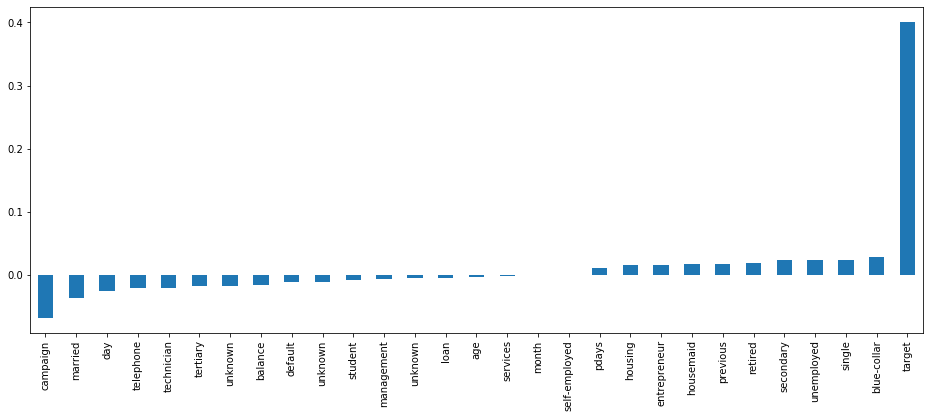

In [51]:
df.corrwith(df["duration"]).sort_values(ascending =True)[:-1].plot(kind ="bar", figsize = (16,6))

### Looking at Campaign vs Duration 
- Campaign - number of contacts performed during this campaign and for this client
- Duration - last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 - We will remove this value for our model

#### Appears the as the campaign increases 
- There is also a slim change the user will subscribe to a term deposit
- The higher the duration the the more likely a term deposit subscription will occurr
- We will consider the suggesiton to remove this feature for a more realistic model

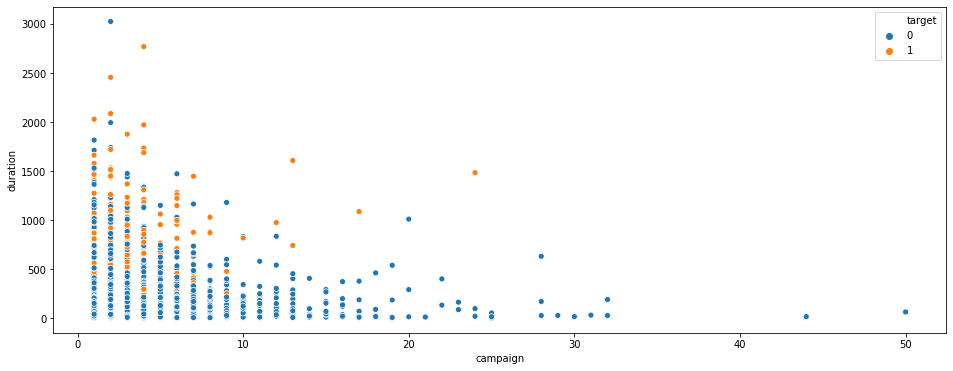

In [52]:
plt.figure(figsize=(16,6))
sns.scatterplot(x =df["campaign"], y= df['duration'], hue=df["target"])

In [53]:
df.drop("duration", axis=1, inplace=True)

In [54]:
df.head()

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,...,unemployed,unknown,married,single,secondary,tertiary,unknown,telephone,unknown,target
0,30,0,1787,0,0,19,10,1,-1,0,...,1,0,1,0,0,0,0,0,0,0
1,33,0,4789,1,1,11,5,1,339,4,...,0,0,1,0,1,0,0,0,0,0
2,35,0,1350,1,0,16,4,1,330,1,...,0,0,0,1,0,1,0,0,0,0
3,30,0,1476,1,1,3,6,4,-1,0,...,0,0,1,0,0,1,0,0,1,0
4,59,0,0,1,0,5,5,1,-1,0,...,0,0,1,0,1,0,0,0,1,0


### Prepraign the data 
- now that we have a data frame of the features we wull use for the model 
- Lets prepare this data for training and testing
- We will begin with SKLearn logistic regression for classification

## Checking df 
- Making sure all values are numeric 
- looks like we missed on feature 
- - lets convert this below 

In [55]:
pout = pd.get_dummies(df["poutcome"], drop_first=True)

In [56]:
df = pd.concat([df, pout], axis=1)

In [57]:
df.drop("poutcome", axis=1, inplace=True)

In [58]:
df.head()

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,...,single,secondary,tertiary,unknown,telephone,unknown,target,other,success,unknown
0,30,0,1787,0,0,19,10,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
1,33,0,4789,1,1,11,5,1,339,4,...,0,1,0,0,0,0,0,0,0,0
2,35,0,1350,1,0,16,4,1,330,1,...,1,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,6,4,-1,0,...,0,0,1,0,0,1,0,0,0,1
4,59,0,0,1,0,5,5,1,-1,0,...,0,1,0,0,0,1,0,0,0,1


In [59]:
df.select_dtypes(exclude="int")

,default,housing,loan,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,...,single,secondary,tertiary,unknown,telephone,unknown,target,other,success,unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4517,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4519,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [60]:
df["target"].value_counts()

0    4000
1     521
Name: target, dtype: int64

In [61]:
X = df.drop("target", axis=1)
y = df["target"]

## Training testing and splitting

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
X_train.shape

(3616, 31)

In [65]:
X_test.shape

(905, 31)

### Importing Model and libraries 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train,y_train)

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
model.classes_

array([0, 1], dtype=uint8)

### Making Predicitons
- using the testing data since the model has not see this data previously 

In [70]:
pred = model.predict(X_test)

### metrics
- Will use the classificaiton report to see how our model did

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

### Model is 80+ % accurate
- we can use this as a good predictor for a client probability of subscribing to a Term Deposit

In [72]:
print(confusion_matrix(y_test, pred))

[[807   0]
 [ 97   1]]


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       1.00      0.01      0.02        98

    accuracy                           0.89       905
   macro avg       0.95      0.51      0.48       905
weighted avg       0.90      0.89      0.84       905



### Random Client
- We want to see what happens when a new client is provided to evaluate 
- Lets take a look at how the model will predict
- Since we do not have new client data we will pass in the a random client from the data frame

In [74]:
from random import randint
random_index = randint(1, len(df))
random_client = df.drop("target", axis=1).iloc[random_index]

### We need the values of the client
- also the values must be reshaped to the training shape we trained our model on

In [75]:
X_train.shape

(3616, 31)

In [76]:
random_client = random_client.values.reshape(1,31)

In [77]:
random_client

array([[37,  0,  0,  0,  0,  6,  6,  1, -1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1]])

### Making Prediction on random Client

In [78]:
model.predict(random_client)

array([0], dtype=uint8)

### Checking True Value
- Will grab form the true data frame

In [79]:
df.iloc[random_index]["target"]

0

### AAN
- LEts see if a Deep Network could improve the prediciton of our model 
- WE will use a sequential model for the model creation

In [91]:
X = df.drop("target", axis=1).values
y = df["target"].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Scaling the data

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scalar = MinMaxScaler()

In [162]:
X_train = scalar.fit_transform(X_train)

In [163]:
X_test = scalar.transform(X_test)

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [174]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=5)

In [175]:
model = Sequential()
model.add(Dense(units = 130, activation ="relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 130, activation ="relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 130, activation ="relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 120, activation ="relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 30, activation ="relu"))
model.add(Dense(units = 1, activation ="sigmoid"))
model.compile(optimizer  = "adam", loss = "binary_crossentropy")

In [176]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=134)

Train on 3616 samples, validate on 905 samples
Epoch 1/134
3616/3616 [==============================] - 3s 756us/sample - loss: 0.3635 - val_loss: 0.3300
Epoch 2/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.3417 - val_loss: 0.3193
Epoch 3/134
3616/3616 [==============================] - 1s 300us/sample - loss: 0.3362 - val_loss: 0.3140
Epoch 4/134
3616/3616 [==============================] - 1s 287us/sample - loss: 0.3332 - val_loss: 0.3225
Epoch 5/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.3233 - val_loss: 0.3142
Epoch 6/134
3616/3616 [==============================] - 1s 287us/sample - loss: 0.3203 - val_loss: 0.3149
Epoch 7/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.3196 - val_loss: 0.3235
Epoch 8/134
3616/3616 [==============================] - 1s 296us/sample - loss: 0.3160 - val_loss: 0.3176
Epoch 9/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.3126 - val_los

3616/3616 [==============================] - 1s 289us/sample - loss: 0.1798 - val_loss: 0.6078
Epoch 77/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.1805 - val_loss: 0.6883
Epoch 78/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.1762 - val_loss: 0.6289
Epoch 79/134
3616/3616 [==============================] - 1s 296us/sample - loss: 0.1817 - val_loss: 0.6369
Epoch 80/134
3616/3616 [==============================] - 1s 288us/sample - loss: 0.1832 - val_loss: 0.6550
Epoch 81/134
3616/3616 [==============================] - 1s 285us/sample - loss: 0.1773 - val_loss: 0.6458
Epoch 82/134
3616/3616 [==============================] - 1s 287us/sample - loss: 0.1812 - val_loss: 0.7075
Epoch 83/134
3616/3616 [==============================] - 1s 292us/sample - loss: 0.1725 - val_loss: 0.6645
Epoch 84/134
3616/3616 [==============================] - 1s 295us/sample - loss: 0.1719 - val_loss: 0.7562
Epoch 85/134
3616/3616 [=================

In [177]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             multiple                  4160      
_________________________________________________________________
dropout_22 (Dropout)         multiple                  0         
_________________________________________________________________
dense_46 (Dense)             multiple                  17030     
_________________________________________________________________
dropout_23 (Dropout)         multiple                  0         
_________________________________________________________________
dense_47 (Dense)             multiple                  17030     
_________________________________________________________________
dropout_24 (Dropout)         multiple                  0         
_________________________________________________________________
dense_48 (Dense)             multiple                 

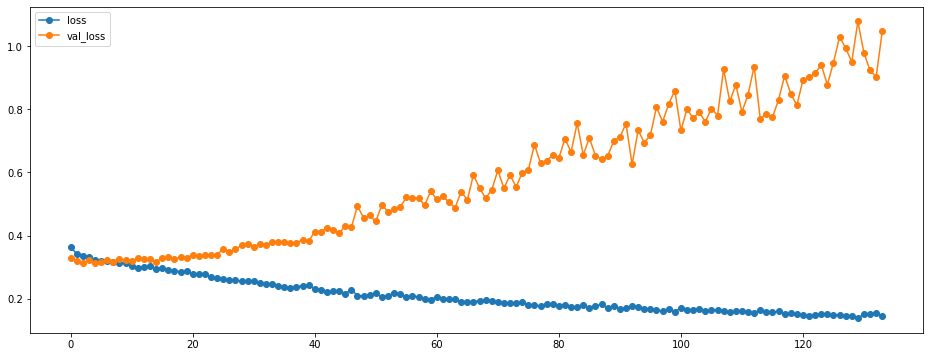

In [178]:
pd.DataFrame(model.history.history).plot(figsize = (16,6), marker = "o")

### Model evaluation and predicitons
- appears that the model is only predicting clas 0 at a 89% accuracy so we need to find out why 

In [179]:
predictions = model.predict_classes(X_test)

In [180]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.42      0.17      0.25        98

    accuracy                           0.89       905
   macro avg       0.67      0.57      0.59       905
weighted avg       0.85      0.89      0.86       905



In [181]:
print(confusion_matrix(y_test, predictions))

[[784  23]
 [ 81  17]]
